In [1]:
import graficas as g
import time
import matplotlib.pyplot as plt
import numpy as np
import importlib

In [2]:
importlib.reload(g)

<module 'graficas' from 'C:\\proyectos\\repositorios\\pt_robustez\\graficas.py'>

In [3]:
num_simulaciones = 50
m = 15
n = 1000

In [4]:
matriz_BA_fallos = []
matriz_WS_fallos = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_fallos = []
    NCC_WS_fallos = []

    for j in range(N):
        NCC_BA_fallos.append(g.componentes_conexas(G_BA))
        NCC_WS_fallos.append(g.componentes_conexas(G_WS))

        G_BA,_ = g.ataques(G_BA,'random')
        G_WS,_ = g.ataques(G_WS,'random')

    matriz_BA_fallos.append(NCC_BA_fallos)
    matriz_WS_fallos.append(NCC_WS_fallos)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")


El tiempo total de ejecución fue: 32.9171199798584


In [5]:
matriz_BA_ataques = []
matriz_WS_ataques = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_ataques = []
    NCC_WS_ataques = []

    for j in range(N):
        NCC_BA_ataques.append(g.componentes_conexas(G_BA))
        NCC_WS_ataques.append(g.componentes_conexas(G_WS))

        G_BA,_ = g.ataques(G_BA,'degree')
        G_WS,_ = g.ataques(G_WS,'degree')

    matriz_BA_ataques.append(NCC_BA_ataques)
    matriz_WS_ataques.append(NCC_WS_ataques)

final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 43.420377016067505


In [6]:
resultados_NCC_BA_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos)]
resultados_NCC_WS_fallos = [sum(col) / num_simulaciones for col in zip(*matriz_WS_fallos)]

resultados_NCC_BA_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques)]
resultados_NCC_WS_ataques = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques)]

In [7]:
#Hay dos formas de medir el LCC, y vamos a usar ambas y a gráficarlas también

matriz_BA_fallos_1 = []
matriz_WS_fallos_1 = []
matriz_BA_fallos_2 = []
matriz_WS_fallos_2 = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    NCC_BA_1 = []
    NCC_WS_1 = []
    NCC_BA_2 = []
    NCC_WS_2 = []

    for j in range(N):
        NCC_BA_1.append(g.LCC(G_BA,1,N))
        NCC_WS_1.append(g.LCC(G_WS,1,N))
        NCC_BA_2.append(g.LCC(G_BA,2,N))
        NCC_WS_2.append(g.LCC(G_WS,2,N))

        G_BA,_ = g.ataques(G_BA,'random')
        G_WS,_ = g.ataques(G_WS,'random')

    matriz_BA_fallos_1.append(NCC_BA_1)
    matriz_WS_fallos_1.append(NCC_WS_1)
    matriz_BA_fallos_2.append(NCC_BA_2)
    matriz_WS_fallos_2.append(NCC_WS_2)


final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 61.919294595718384


In [8]:
matriz_BA_ataques_1 = []
matriz_WS_ataques_1 = []
matriz_BA_ataques_2 = []
matriz_WS_ataques_2 = []

inicio = time.time()

for i in range(num_simulaciones):
    #print(f"Vamos a hacer la ",i+1,"-ésima simulación")
    G_BA = g.crear_grafica('barabasi',n,m,0)
    G_WS = g.crear_grafica('watts',n,2*m,0.5)

    N = len(G_BA)

    LCC_BA_1 = []
    LCC_WS_1 = []
    LCC_BA_2 = []
    LCC_WS_2 = []

    for j in range(N):
        LCC_BA_1.append(g.LCC(G_BA,1,N))
        LCC_WS_1.append(g.LCC(G_WS,1,N))
        LCC_BA_2.append(g.LCC(G_BA,2,N))
        LCC_WS_2.append(g.LCC(G_WS,2,N))

        G_BA,_ = g.ataques(G_BA,'degree')
        G_WS,_ = g.ataques(G_WS,'degree')

    matriz_BA_ataques_1.append(LCC_BA_1)
    matriz_WS_ataques_1.append(LCC_WS_1)
    matriz_BA_ataques_2.append(LCC_BA_2)
    matriz_WS_ataques_2.append(LCC_WS_2)


final = time.time()

print(f"El tiempo total de ejecución fue: {final-inicio}")

El tiempo total de ejecución fue: 74.90092468261719


In [9]:
resultados_LCC_BA_fallos_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_1)]
resultados_LCC_WS_fallos_1 = [sum(col)/ num_simulaciones for col in zip(*matriz_WS_fallos_1)]
resultados_LCC_BA_fallos_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_2)]
resultados_LCC_WS_fallos_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_fallos_2)]

resultados_LCC_BA_ataques_1 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques_1)]
resultados_LCC_WS_ataques_1 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques_1)]
resultados_LCC_BA_ataques_2 = [sum(col) / num_simulaciones for col in zip(*matriz_BA_ataques_2)]
resultados_LCC_WS_ataques_2 = [sum(col) / num_simulaciones for col in zip(*matriz_WS_ataques_2)]

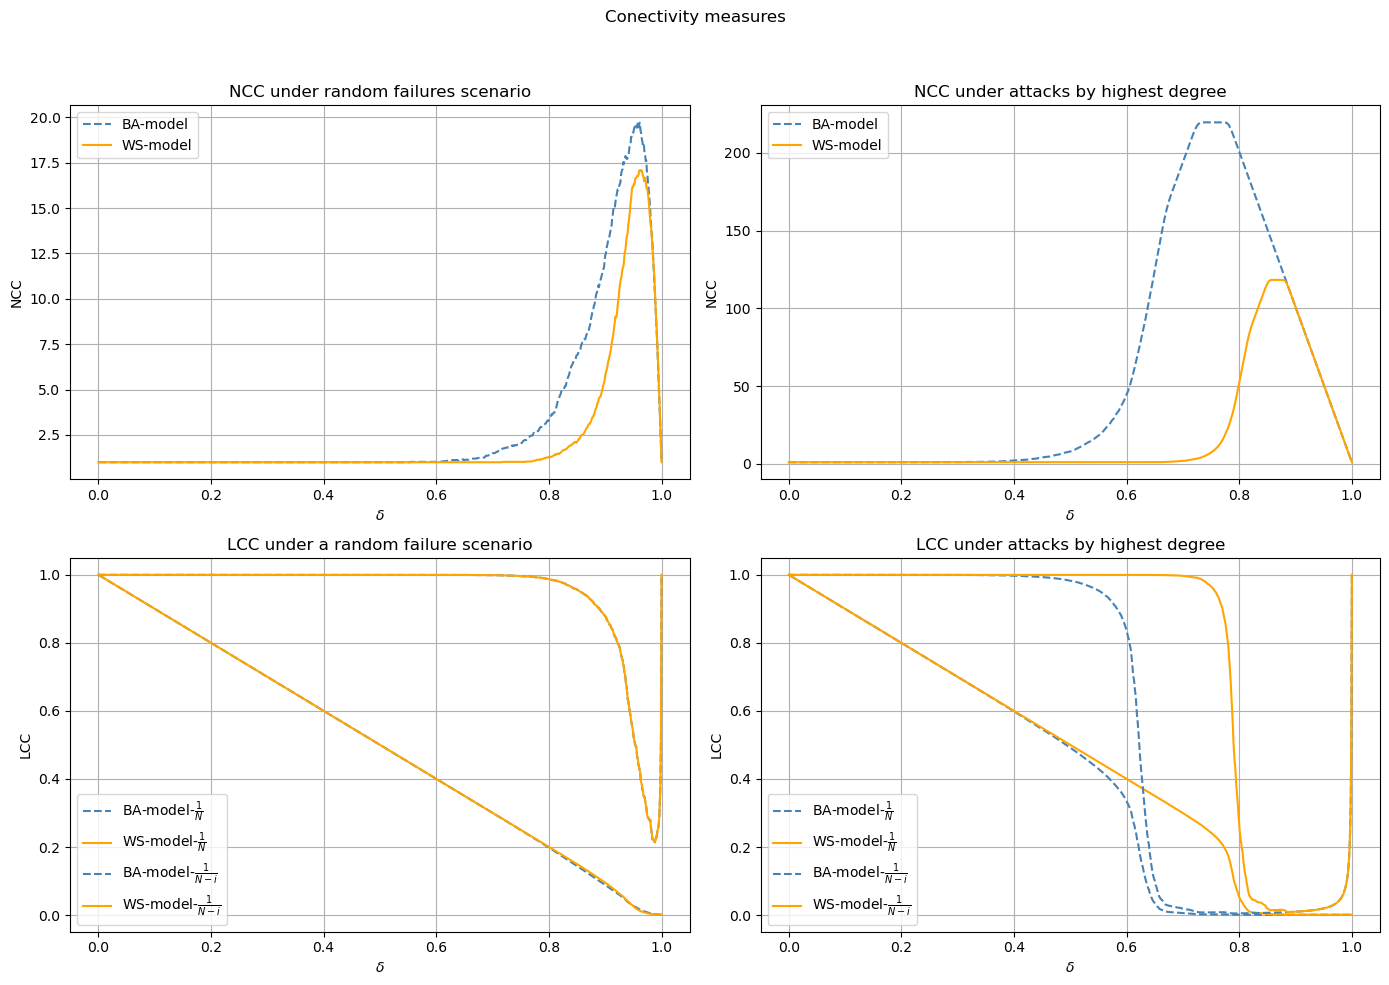

In [22]:
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

x = np.linspace(0,1,1000)

# Gráfica 1: NCC - Fallos
axs[0, 0].plot(x,resultados_NCC_BA_fallos, label="BA-model", linestyle='--',color="steelblue")
axs[0, 0].plot(x,resultados_NCC_WS_fallos, label="WS-model", color="orange")
axs[0, 0].set_title("NCC under random failures scenario")
axs[0, 0].set_xlabel(r"$\delta$")
axs[0, 0].set_ylabel("NCC")
axs[0, 0].legend()
axs[0,0].grid(True)

# Gráfica 2: NCC - Ataques
axs[0, 1].plot(x,resultados_NCC_BA_ataques, label="BA-model", linestyle='--',color="steelblue")
axs[0, 1].plot(x,resultados_NCC_WS_ataques, label="WS-model", color="orange")
axs[0, 1].set_title("NCC under attacks by highest degree")
axs[0, 1].set_xlabel(r"$\delta$")
axs[0, 1].set_ylabel("NCC")
axs[0, 1].legend(loc='upper left')
axs[0,1].grid(True)


# Gráfica 3: LCC - Fallos (criterio 1 y 2)
axs[1, 0].plot(x,resultados_LCC_BA_fallos_1, label=r"BA-model-$\frac{1}{N}$", linestyle='--', color="steelblue")
axs[1, 0].plot(x,resultados_LCC_WS_fallos_1, label=r"WS-model-$\frac{1}{N}$", linestyle='-', color="orange")
axs[1, 0].plot(x,resultados_LCC_BA_fallos_2, label=r"BA-model-$\frac{1}{N-i}$", linestyle='--', color="steelblue")
axs[1, 0].plot(x,resultados_LCC_WS_fallos_2, label=r"WS-model-$\frac{1}{N-i}$", linestyle='-', color="orange")
axs[1, 0].set_title("LCC under a random failure scenario")
axs[1, 0].set_xlabel(r"$\delta$")
axs[1, 0].set_ylabel("LCC")
axs[1,0].legend()
axs[1,0].grid(True)

# Gráfica 4: LCC - Ataques (criterio 1 y 2)
axs[1, 1].plot(x,resultados_LCC_BA_ataques_1, label=r"BA-model-$\frac{1}{N}$", linestyle='--', color="steelblue")
axs[1, 1].plot(x,resultados_LCC_WS_ataques_1, label=r"WS-model-$\frac{1}{N}$", linestyle='-', color="orange")
axs[1, 1].plot(x,resultados_LCC_BA_ataques_2, label=r"BA-model-$\frac{1}{N-i}$", linestyle='--', color="steelblue")
axs[1, 1].plot(x,resultados_LCC_WS_ataques_2, label=r"WS-model-$\frac{1}{N-i}$", linestyle='-', color="orange")
axs[1, 1].set_title("LCC under attacks by highest degree")
axs[1, 1].set_xlabel(r"$\delta$")
axs[1, 1].set_ylabel("LCC")
axs[1, 1].legend()

plt.grid(True)
plt.suptitle('Conectivity measures')
plt.savefig("medidas_conectividad.png",dpi=300)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()